ROC (Receiver Operating Characteristic) Curve:
The ROC curve is a graphical plot that shows the performance of a classification model at all classification thresholds. It plots True Positive Rate (Sensitivity) on the Y-axis against False Positive Rate (1 - Specificity) on the X-axis.

A model that performs well will have a curve closer to the top-left corner, indicating high sensitivity and low false positives.

The AUC (Area Under the Curve) value summarizes this performance higher AUC means better model discrimination between classes.

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, random_state=42, n_redundant=0)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
model_prob = model.predict_proba(X_test)[:,1]
model_dummy = [0 for i in range(0,len(model_prob))]

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

print(f' The Area under the ROC curve {roc_auc_score(y_test, model_prob)}')
print(f' The Area under the ROC curve for Dummy model {roc_auc_score(y_test, model_dummy)}')

 The Area under the ROC curve 0.9480352062588904
 The Area under the ROC curve for Dummy model 0.5


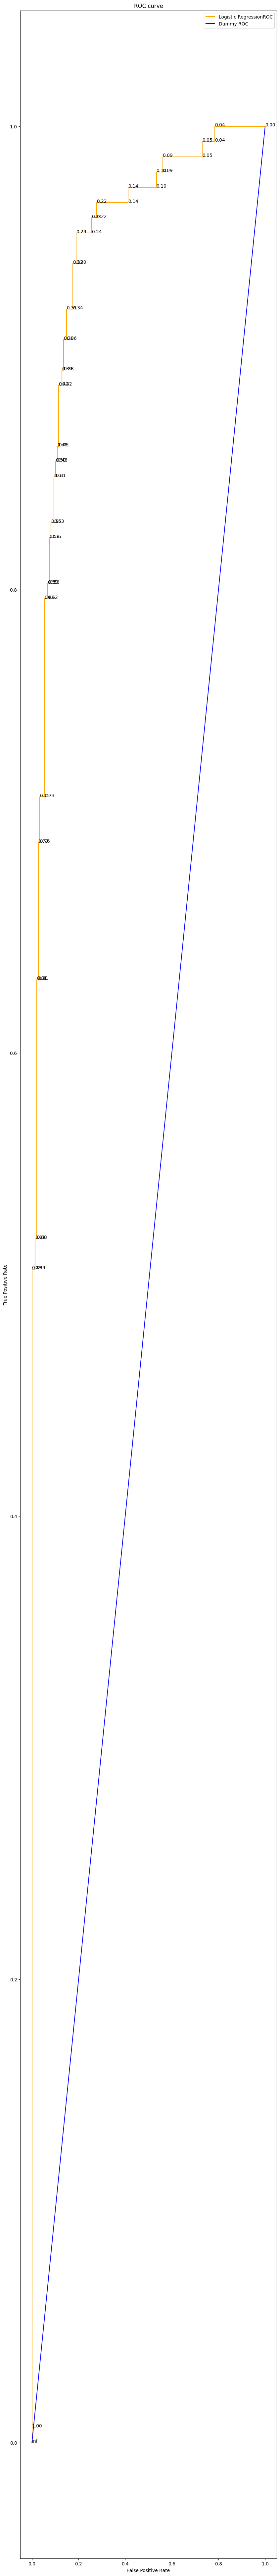

In [24]:
plt.figure(figsize=(10,100))


model_FPR, model_TPR, model_thresholds = roc_curve(y_test, model_prob)
dummy_FPR, dummy_TPR, dummy_thresholds = roc_curve(y_test, model_dummy)
import matplotlib.pyplot as plt
plt.plot(model_FPR, model_TPR, color='orange', label='Logistic RegressionROC')
plt.plot(dummy_FPR, dummy_TPR, color='blue', label='Dummy ROC')


for fpr, tpr, thresh in zip(model_FPR, model_TPR, model_thresholds):
    plt.annotate(f'{thresh:.2f}', (fpr, tpr))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()   

In [14]:
model_FPR, model_TPR, model_thresholds = roc_curve(y_test, model_prob)

In [25]:
model.predict_proba(X_test)[:,1]

array([0.01522645, 0.98832299, 0.79322573, 0.45994683, 0.08764338,
       0.35172641, 0.93184249, 0.89670371, 0.17466738, 0.8629698 ,
       0.95729523, 0.02865428, 0.516692  , 0.93215311, 0.99556511,
       0.94533679, 0.91704896, 0.52940823, 0.29783307, 0.14463093,
       0.95860545, 0.97915104, 0.98153392, 0.66533576, 0.55686123,
       0.11087411, 0.04891684, 0.08362263, 0.95522979, 0.91633854,
       0.0256594 , 0.99267552, 0.26942199, 0.03800938, 0.79652477,
       0.75856167, 0.92409483, 0.97975546, 0.0653426 , 0.25340383,
       0.09446727, 0.07069846, 0.08031077, 0.24384763, 0.34726396,
       0.05248778, 0.48285411, 0.51165522, 0.71164654, 0.0155969 ,
       0.91549356, 0.88733044, 0.01435143, 0.62435426, 0.130546  ,
       0.19697849, 0.45096752, 0.78885384, 0.99959599, 0.6291247 ,
       0.98593743, 0.02247474, 0.7612924 , 0.9932444 , 0.00339434,
       0.89909818, 0.35257673, 0.80774532, 0.96786897, 0.94965652,
       0.68637509, 0.75000405, 0.62157328, 0.02885066, 0.06688